<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">


# Web Scraping for Indeed.com and Predicting Salaries

### Business Case Overview

You're working as a data scientist for a contracting firm that's rapidly expanding. Now that they have their most valuable employee (you!), they need to leverage data to win more contracts. Your firm offers technology and scientific solutions and wants to be competitive in the hiring market. Your principal wants you to

   - determine the industry factors that are most important in predicting the salary amounts for these data.

To limit the scope, your principal has suggested that you *focus on data-related job postings*, e.g. data scientist, data analyst, research scientist, business intelligence, and any others you might think of. You may also want to decrease the scope by *limiting your search to a single region.*

Hint: Aggregators like [Indeed.com](https://www.indeed.com) regularly pool job postings from a variety of markets and industries.

**Goal:** Scrape your own data from a job aggregation tool like Indeed.com in order to collect the data to best answer this question.

---

### Directions

In this project you will be leveraging a variety of skills. The first will be to use the web-scraping and/or API techniques you've learned to collect data on data jobs from Indeed.com or another aggregator. Once you have collected and cleaned the data, you will use it to address the question above.

### Factors that impact salary

To predict salary the most appropriate approach would be a regression model.
Here instead we just want to estimate which factors (like location, job title, job level, industry sector) lead to high or low salary and work with a classification model. To do so, split the salary into two groups of high and low salary, for example by choosing the median salary as a threshold (in principle you could choose any single or multiple splitting points).

Use all the skills you have learned so far to build a predictive model.
Whatever you decide to use, the most important thing is to justify your choices and interpret your results. *Communication of your process is key.* Note that most listings **DO NOT** come with salary information. You'll need to be able to extrapolate or predict the expected salaries for these listings.

### Scraping job listings from Indeed.com

We will be scraping job listings from Indeed.com using BeautifulSoup. Luckily, Indeed.com is a simple text page where we can easily find relevant entries.

First, look at the source of an Indeed.com page: (http://www.indeed.com/jobs?q=data+scientist+%2420%2C000&l=New+York&start=10").

Notice, each job listing is underneath a `div` tag with a class name of `result`. We can use BeautifulSoup to extract those. 

#### Setup a request (using `requests`) to the URL below. Use BeautifulSoup to parse the page and extract all results (HINT: Look for div tags with class name result)

The URL here has many query parameters:

- `q` for the job search
- This is followed by "+20,000" to return results with salaries (or expected salaries >$20,000)
- `l` for a location 
- `start` for what result number to start on

## Notes
Many apologies Bertie, there is some scraping code within this notebook and some within other notebooks, as this one was getting to large to handle. Within the other notebooks you can find the collection, cleaning and exporting of jobs in particular countries. The final data set, made up of the scrapes from all countries transformed to GBP are in this notebook along with all the modelling and analysis.

In [240]:
import requests
import bs4
from bs4 import BeautifulSoup
import numpy as np
import pandas as pd
from tqdm import tqdm


In [241]:
URL = "http://www.indeed.com/jobs?q=data+scientist+%2420%2C000&l=New+York&start=0"

In [242]:
r = requests.get(URL)

In [243]:
# print(r.text)

In [244]:
# r.content

Let's look at one result more closely. A single `result` looks like

```
<div class=" row result" data-jk="2480d203f7e97210" data-tn-component="organicJob" id="p_2480d203f7e97210" itemscope="" itemtype="http://schema.org/JobPosting">
<h2 class="jobtitle" id="jl_2480d203f7e97210">
<a class="turnstileLink" data-tn-element="jobTitle" onmousedown="return rclk(this,jobmap[0],1);" rel="nofollow" target="_blank" title="AVP/Quantitative Analyst">AVP/Quantitative Analyst</a>
</h2>
<span class="company" itemprop="hiringOrganization" itemtype="http://schema.org/Organization">
<span itemprop="name">
<a href="/cmp/Alliancebernstein?from=SERP&amp;campaignid=serp-linkcompanyname&amp;fromjk=2480d203f7e97210&amp;jcid=b374f2a780e04789" target="_blank">
    AllianceBernstein</a></span>
</span>
<tr>
<td class="snip">
<nobr>$117,500 - $127,500 a year</nobr>
<div>
<span class="summary" itemprop="description">
C onduct quantitative and statistical research as well as portfolio management for various investment portfolios. Collaborate with Quantitative Analysts and</span>
</div>
</div>
</td>
</tr>
</table>
</div>
```

While this has some more verbose elements removed, we can see that there is some structure to the above:
- The salary is in a `span` with `class='salaryText'`.
- The title of a job is in a link with class set to `jobtitle` and a `data-tn-element='jobTitle'`.  
- The location is set in a `span` with `class='location'`. 
- The company is set in a `span` with `class='company'`. 
- Decide which other components could be relevant, for example the region or the summary of the job advert.

### Write 4 functions to extract each item: location, company, job, and salary.

Example: 
```python
def extract_location_from_result(result):
    return result.find ...
```


- **Make sure these functions are robust and can handle cases where the data/field may not be available.**
    - Remember to check if a field is empty or `None` for attempting to call methods on it.
    - Remember to use `try/except` if you anticipate errors.
- **Test** the functions on the results above and simple examples.

In [341]:
# soup = BeautifulSoup(r.text, 'html.parser')
# soup.prettify()

In [342]:
# print(soup.get_text()[1000:2000])

In [248]:
# First div tag 
# soup.find_all('div')

In [249]:
# soup.find_all('span')

In [253]:
result = soup.find_all('div', class_='job_seen_beacon')[4] # Just to check the information is being removed correctly

In [343]:
def find_salary(result):
    
    # Function to find the salary of a job from the indeed website US
    
    try:
        return result.find(class_='attribute_snippet').text
    except:
        return np.nan

In [255]:
find_salary(result)

'$75,504 - $90,000 a year'

In [344]:
def find_job_title(result):
    
    # Function to find the job title of a job from the indeed website
    
    try: 
        return result.find(class_='jobTitle').text
    except:
        return np.nan

In [ ]:
find_job_title(result)

In [345]:
def find_company_name(result):
    
    # Function to find the company name of a job from the indeed website 
    
    try:
        return result.find(class_='companyName').text
    except: 
        return np.nan

In [259]:
find_company_name(result)

'NYC Careers'

In [346]:
def find_company_location(result):
    
    # Function to find the location of a job from the indeed website 
    
    try:
        return result.find(class_='companyLocation').text
    except: 
        return np.nan

In [261]:
find_company_location(result)

'Manhattan, NY+6 locations'

In [347]:
def find_job_snippet(result):
    
    # Function to find the job snippet of a job from the indeed website 
    
    try:
        return result.find(class_='job-snippet').text.strip('\n')
    except:
        return np.nan

In [263]:
find_job_snippet(result)

'Which include but are not limited to a mastery in conducting data landscape analyses, identifying and documenting data sources, joining and integrating datasets…'

In [265]:
# Finding information, 1 page test: 
job_title = []
company_name = []
company_location = []
salary = []
snippet = []

for i in soup.find_all('div', class_='job_seen_beacon'):
    job_title.append(find_job_title(i))
    company_name.append(find_company_name(i))
    company_location.append(find_company_location(i))
    salary.append(find_salary(i))
    snippet.append(find_job_snippet(i))
    
    
jobs = pd.DataFrame(list(zip(job_title, company_name, company_location, salary, snippet)),
               columns =['job_title', 'company_name', 'company_location', 'salary','job_snippet'])

jobs

# Hooray

,job_title,company_name,company_location,salary,job_snippet
0,Readership Data Scientist,Barclays,"New York, NY 10019 (Midtown area)+1 location",NaN,An understanding of data pipelining and automa...
1,Data Scientist,RELX,"New York, NY+1 location",NaN,to be added We are an equal opportunity employ...
2,newData Scientist,Farfetch,"New York, NY",NaN,Whether it's churning gigabytes of ecommerce d...
3,Data Scientist,AlphaSights Ltd.,"New York, NY+1 location",NaN,Help maintain data pipelines and evolve data E...
4,Data Scientist,NYC Careers,"Manhattan, NY+6 locations","$75,504 - $90,000 a year",Which include but are not limited to a mastery...
5,newData Scientist,"Lokavant, Inc.",New York State+1 location•Remote,NaN,"Experience with healthcare data, ideally clini..."
6,"Data Scientist, Personalization",Spotify,"New York, NY+7 locations•Remote",NaN,Mentor and coach other data scientists.\nThis ...
7,Data Scientist,MetLife,"New York, NY",NaN,In an ongoing effort to grow and enrich MetLif...
8,newData Scientist,Osmose Utilities Services,"Depew, NY 14043",NaN,Develop custom data models and algorithms to a...
9,Data Scientist - Nielsen 2022 Full-time Univer...,Nielsen,"New York, NY+2 locations",NaN,Assist in the design and implementation strate...


Now, to scale up our scraping, we need to accumulate more results. We can do this by examining the URL above.

- "http://www.indeed.com/jobs?q=data+scientist+%2420%2C000&l=New+York&start=10"

There are two query parameters here we can alter to collect more results, the `l=New+York` and the `start=10`. The first controls the location of the results (so we can try a different city). The second controls where in the results to start and gives 10 results (thus, we can keep incrementing by 10 to go further in the list).

### Complete the following code to collect results from multiple cities and starting points. 
- Enter your city below to add it to the search.
- Remember to convert your salary to U.S. Dollars to match the other cities if the currency is different.

In [348]:
from random import randint
from time import sleep

In [333]:
# This page is needed as the tagging for salary in the US and UK are slightly different

def find_salary2(result):
    
    # Function to find the salary of a job on the indeed website (non-US)
    
    try:
        return result.find(class_='salary-snippet').text
    except:
        return np.nan

In [335]:
# Holders for features in AU jobs

job_title_au = []
company_name_au = []
company_location_au = []
salary_au = []
snippet_au = []

### Notes
The scraping code for AU jobs is below (US further down the page). As well as a reasonably long timer I manually swapped the location on my vpn periodically to change the incoming IP address and bypass the captcha. This is how I eventually managed all the scrapes. 

In [337]:
# Scrape for Australian jobs

for start in tqdm(range(0, 371, 10)):
        url = "https://au.indeed.com/jobs?q=Data+Scientist&start={}".format(start)
        r = requests.get(url)

        sleep(randint(10,20))
        soup = BeautifulSoup(r.text, 'html.parser')
        for i in soup.find_all('div', class_='job_seen_beacon'):
            job_title_au.append(find_job_title(i))
            company_name_au.append(find_company_name(i))
            company_location_au.append(find_company_location(i))
            salary_au.append(find_salary2(i))
            snippet_au.append(find_job_snippet(i))

100%|██████████| 38/38 [12:34<00:00, 19.86s/it]


In [338]:
# Australian jobs to dataframes

AU_jobs = pd.DataFrame(list(zip(job_title_au, company_name_au, company_location_au, salary_au, snippet_au)),
                    columns =['job_title', 'company_name', 'company_location', 'salary','job_snippet'])

AU_jobs.tail(10)

,job_title,company_name,company_location,salary,job_snippet
580,DevOps ML Engineer,CSKnexus,Sydney NSW,NaN,Expert with Cloud software and tools on data p...
581,Analytics Consultant - Fraud - APAC,Eagna Consulting,Sydney NSW,"$230,000 a year",Build analytical data models and present resul...
582,"Analytics Consulting Partner, Sydney CBD",inDmand,Sydney NSW,"$200,000 - $250,000 a year",High profile role - Influence how this practic...
583,Senior Machine Learning Engineer - Marketing T...,Talent Insights Group,Sydney NSW,"$160,000 - $180,000 a year",You will also help deploy and productionise ma...
584,Machine Learning Engineer with Data Engineer/D...,Correlate Resources,Sydney NSW,NaN,"Solid knowledge of data structures, algorithms..."
585,Lead Analytics Engineer,Talenza,Sydney NSW,NaN,You will be a key person working alongside mul...
586,Manager Analytics & Insights,Mable,Sydney NSW,NaN,5+ years of data analysis experience developin...
587,"Data Scientist, International Analytics",DoorDash,Melbourne VIC,NaN,"5+ years of experience in data analytics, cons..."
588,Senior Python Developer - Machine Learning & A...,Limelight Consulting Group Pty Ltd,Sydney NSW,NaN,"A real passion for machine learning, data stru..."
589,Principal AI Engineer,Onset,Sydney NSW,NaN,Engaging customers are a deep and meaningful l...


In [339]:
# Remove duplicates from AU jobs

AU_jobs_no_dup = AU_jobs.drop_duplicates(subset=None, keep='first', inplace=False, ignore_index=False)
AU_jobs_no_dup.count()

job_title           272
company_name        272
company_location    272
salary               60
job_snippet         272
dtype: int64

In [340]:
# Save Austrialian jobs in a CSV

AU_jobs_no_dup.to_csv('AU_jobs.csv')

In [354]:
# Holders for American jobs

job_title = []
company_name = []
company_location = []
salary = []
snippet = []


In [ ]:
# Holder for already scraped cities

scraped = ['New+York', 'Chicago', 'San+Francisco', 'Austin', 'Seattle', 'Los+Angeles', 'Philadelphia', 'Atlanta',
           'Dallas', 'Pittsburgh', 'Portland', 'Phoenix', 'Denver','Houston', 'Miami', 'San+Antonio', 'San+Diego']

not_scraped = ['Jacksonville','Sacramento']

In [355]:
max_results_per_city = 2672 # Set this to a high-value (5000) to generate more results. 
# Crawling more results, will also take much longer. First test your code on a small number of results and then expand.

for city in set(['San+Jose','Remote']):
    for start in tqdm(range(0, max_results_per_city, 16)):
        url = "http://www.indeed.com/jobs?q=data+scientist+%2420%2C000&l={}&start={}".format(city,start)
        r = requests.get(url)

        sleep(randint(10,20))
        soup = BeautifulSoup(r.text, 'html.parser')
        for i in soup.find_all('div', class_='job_seen_beacon'):
            job_title.append(find_job_title(i))
            company_name.append(find_company_name(i))
            company_location.append(find_company_location(i))
            salary.append(find_salary(i))
            snippet.append(find_job_snippet(i))
            
len(job_title)

100%|██████████| 167/167 [47:18<00:00, 17.00s/it]


4973

In [356]:
US_jobs = pd.DataFrame(list(zip(job_title, company_name, company_location, salary, snippet)),
                    columns =['job_title', 'company_name', 'company_location', 'salary','job_snippet'])

US_jobs.tail(10)

,job_title,company_name,company_location,salary,job_snippet
4963,Stat Programmer II,Gilead Sciences,"Foster City, CA•Remote",NaN,Assists in submissions of electronic data (e.g...
4964,Actuary Assistant or Associate,Cambia Health Solutions,"Seattle, WA 98101 (Denny Triangle area)•Remote",NaN,The Cambia Actuarial Division is responsible f...
4965,newSenior Statistician,NORC at the University of Chicago,"Chicago, IL•Remote",NaN,Data integration—record linkage (entity resolu...
4966,"Associate Data Science Director, Advanced Anal...",IQVIA,Remote,NaN,Ensure data quality throughout all stages of a...
4967,newPrincipal Field Solution Architect – Artifi...,CDW,Remote,NaN,Define the data elements shared between this b...
4968,Data Science Manager,Varo Money,Remote,NaN,Set requirements for experiments to ensure cle...
4969,Salesforce/Sitetracker - Senior Data Analyst -...,Lumen,Remote,NaN,Manipulate and conduct data analysis on large ...
4970,newPrincipal Statistician (Remote),MSD,"West Point, PA•Remote",NaN,You will be a key member of cross functional t...
4971,Sr. Principal Mission Engineer AI Programs,Northrop Grumman,"Linthicum, MD•Remote","$145,000 - $217,400 a year",Telecommute: Yes- May Consider Occasional/Part...
4972,Corporate FSQA Statistician / Quality Engineer...,Ocean Spray,"Las Vegas, NV•Remote",NaN,Able to utilize and critically evaluate data f...


In [357]:
# Each set of US jobs had thier duplicates dropped

US_jobs_no_dup = US_jobs.drop_duplicates(subset=None, keep='first', inplace=False, ignore_index=False)
US_jobs_no_dup
US_jobs_no_dup.shape

(1237, 5)

In [358]:
# Check how many salaries were in this scrape 

US_jobs_no_dup.count()

job_title           1237
company_name        1237
company_location    1237
salary                62
job_snippet         1237
dtype: int64

In [359]:
# Save the scrapped American Jobs (Each CSV names the range of cities, the full range can be found in 'scraped')

US_jobs_no_dup.to_csv('US_jobs(San_Jose_Remote.csv')

In [193]:
# Scraping UK jobs

URL = 'https://uk.indeed.com/jobs?q=data%20scientist&l=United%20Kingdom&start=0'

In [194]:
s = requests.get(URL)

In [195]:
soup = BeautifulSoup(s.text, 'html.parser')

In [217]:
job_title3 = []
company_name3 = []
company_location3 = []
salary3 = []
snippet3 = []


In [221]:
# Finding information: 
for start in tqdm(range(0, 5000, 16)):
    url = "https://uk.indeed.com/jobs?q=data%20scientist&l=United%20Kingdom&start={}".format(start)
    r = requests.get(url)

    sleep(randint(1,3))
    
    soup = BeautifulSoup(r.text, 'html.parser')
    
    for i in soup.find_all('div', class_='job_seen_beacon'):
        job_title3.append(find_job_title(i))
        company_name3.append(find_company_name(i))
        company_location3.append(find_company_location(i))
        salary3.append(find_salary2(i))
        snippet3.append(find_job_snippet(i))
    
    
UK_jobs_test = pd.DataFrame(list(zip(job_title3, company_name3, company_location3, salary3, snippet3)),
               columns =['job_title', 'company_name', 'company_location', 'salary','job_snippet'])

UK_jobs_test.head(5)

# This cell has an error below as I had finished scraping and accidentally ran the code again (oops)
# The error is from me interupting the kernel 

  1%|          | 3/313 [00:08<15:00,  2.91s/it]


KeyboardInterrupt: 

In [224]:
# Turn Uk jobs to CSV for saving (the duplicates have been removed in the file called Uk jobs) 

UK_jobs_test.to_csv('UK_jobs.csv')

In [222]:
UK_jobs_test.head(5)

,job_title,company_name,company_location,salary,job_snippet
0,Graduate Data Scientist,L&Q,Stratford•Temporarily Remote,"£27,000 a year",You will join a small but strong team of data ...
1,Machine Learning Engineer - Recommendation,ByteDance,London,"£33,894 - £92,797 a year",Experience in one or more of the following are...
2,Data scientist - Data base expert,JEOL,Long Hanborough OX29 8LJ•Remote,"£50,000 - £61,000 a year",Create a solution and user tools to store and ...
3,Rapidminer Data Scientist,Intelligent Data Technologies Limited (Lucid),London•Remote,"£35,000 - £82,000 a year",Apply all phases of the data science process f...
4,Junior Data Scientist,Novafutur,London,NaN,Being a data scientist would require the abili...


In [220]:
UK_jobs_test.count()

job_title           4384
company_name        4383
company_location    4384
salary              1024
job_snippet         4384
dtype: int64

In [ ]:
# Holders for Ireland jobs

job_title4 = []
company_name4 = []
company_location4 = []
salary4 = []
snippet4 = []

In [199]:
# Scraping Ireland Jobs 

for start in tqdm(range(0,5000,16)):
    url = 'https://uk.indeed.com/jobs?q=data%20scientist&l=Ireland&start={}'.format(start)
    r = requests.get(url)
    
    soup = BeautifulSout(r.text, 'html.parser')
        
    for i in soup.find_all('div', class_='job_seen_beacon'):
        job_title4.append(find_job_title(i))
        company_name4.append(find_company_name(i))
        company_location4.append(find_company_location(i))
        salary4.append(find_salary2(i))
        snippet4.append(find_job_snippet(i))
            

3000

In [353]:
# Dataframe of Ireland Jobs

# IE_jobs = pd.DataFrame(list(zip(job_title, company_name, company_location, salary, snippet)),
               # columns =['job_title', 'company_name', 'company_location', 'salary','job_snippet'])

In [203]:
IE_jobs.to_csv('IE_jobs.csv')

Lastly, we need to clean up salary data. 

1. Only a small number of the scraped results have salary information - only these will be used for modeling.
1. Some of the salaries are not yearly but hourly or weekly, these will not be useful to us for now.
1. Some of the entries may be duplicated.
1. The salaries are given as text and usually with ranges.

#### Find the entries with annual salary entries, by filtering the entries without salaries or salaries that are not yearly (filter those that refer to hour or week). Also, remove duplicate entries.

#### Write a function that takes a salary string and converts it to a number, averaging a salary range if necessary.

### Save your results as a CSV

## Notes

You will find the dataframes from CSV files cleaned in individual notebooks named e.g Uk jobs / Canada Jobs.
The data is then reconverted to CSV and named e.g ie_df. 
The units of currently have already been converted to GBP. 

### Load in the the data of scraped salaries

In [241]:
import pandas as pd

In [242]:
df1 = pd.read_csv('au_df')
df2 = pd.read_csv('ie_df')
df3 = pd.read_csv('uk_df')
df4 = pd.read_csv('ca_df')
df5 = pd.read_csv('us_df')

In [243]:
frames = [df1, df2, df3, df4, df5]

jobs = pd.concat(frames)

jobs = jobs.drop(columns='Unnamed: 0')

jobs.count()

job_title           918
company_name        918
company_location    918
salary              918
job_snippet         918
country_location    918
dtype: int64

In [244]:
jobs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 918 entries, 0 to 261
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   job_title         918 non-null    object 
 1   company_name      918 non-null    object 
 2   company_location  918 non-null    object 
 3   salary            918 non-null    float64
 4   job_snippet       918 non-null    object 
 5   country_location  918 non-null    object 
dtypes: float64(1), object(5)
memory usage: 50.2+ KB


### We want to predict a binary variable - whether the salary was low or high. Compute the median salary and create a new binary variable that is true when the salary is high (above the median).

We could also perform Linear Regression (or any regression) to predict the salary value here. Instead, we are going to convert this into a _binary_ classification problem, by predicting two classes, HIGH vs LOW salary.

While performing regression may be better, performing classification may help remove some of the noise of the extreme salaries. We don't have to choose the `median` as the splitting point - we could also split on the 75th percentile or any other reasonable breaking point.

In fact, the ideal scenario may be to predict many levels of salaries.

In [245]:
jobs.salary.mean()

59793.49130718953

In [246]:
jobs.salary.median()

57437.5

In [247]:
import seaborn as sns

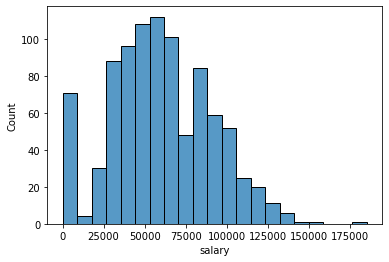

In [248]:
sns.histplot(jobs.salary);

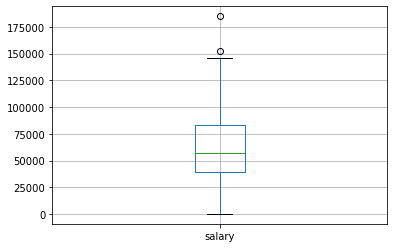

In [249]:
jobs.boxplot(column='salary');

We can see from the histogram the distribution is slightly positively skewed.
We can see from the boxplot there are upper outliers.
Due to this we should use the median as the more appropriate average to split the salaries. 

In [250]:
median = jobs.salary.median()
median

57437.5

In [251]:
def classify_salary(x):
    if x >= median:
        return 1
    else:
        return 0

In [252]:
jobs['salary_class'] = jobs.salary.map(classify_salary)

In [253]:
jobs

,job_title,company_name,company_location,salary,job_snippet,country_location,salary_class
0,newEcologist/Data Scientist,Department of Agriculture & Water Resources,Darwin NT,62838.6,Experience developing AI/deep learning workflo...,AU,1
1,newEcologist/Data Scientist,Australian Department of the Environment,Darwin NT,62838.6,Experience developing AI/deep learning workflo...,AU,1
2,newData Scientist,The Staffing Group,Sydney NSW+1 location,63250.0,"A strong background in data science, analytics...",AU,1
3,newData Professional - Data Analyst/Scientist ...,The Staffing Group,Melbourne VIC+1 location,52250.0,We are looking for a data analyst/scientist wh...,AU,0
4,Junior Machine Learning Engineer,XY Sense,Melbourne VIC,44000.0,Reporting directly to the CTO with technical l...,AU,0
...,...,...,...,...,...,...,...
257,Data Scientist - Nationwide Opportunities,"Amazon Web Services, Inc.","Houston, TX",84878.0,Experience in an ML engineer or data scientist...,US,1
258,Senior Data Engineer,Xecta,"Houston, TX",92500.0,The data engineer will support our software de...,US,1
259,Natural Language Programming Specialist,Statistical Vision,"Houston, TX 77043 (Spring Branch West area)•Te...",59200.0,Conduct sentiment analysis and other text clas...,US,1
260,Data Scientist,WALT Labs,"Spring, TX",59940.0,Present information using data visualization t...,US,1


#### Thought experiment: What is the baseline accuracy for this model?

In [254]:
jobs.salary_class.value_counts(normalize=True).max()

0.5

The baseline of a binary classification model split on the median will always be 0.5 as the median splits the data into two equal parts

A binary classification split on the mean would not have a 0.5 baseline unless the data was symmetrical 

### Create a classification model to predict High/Low salary. 


- Start by ONLY using the location as a feature.
- Use at least two different classifiers you find suitable.
- Remember that scaling your features might be necessary.
- Display the coefficients/feature importances and write a short summary of what they mean.
- Create a few new variables in your dataframe to represent interesting features of a job title (e.g. whether 'Senior' or 'Manager' is in the title).
- Incorporate other text features from the title or summary that you believe will predict the salary.
- Then build new classification models including also those features. Do they add any value?
- Tune your models by testing parameter ranges, regularization strengths, etc. Discuss how that affects your models.
- Discuss model coefficients or feature importances as applicable.

In [255]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier

In [256]:
# Model fitter function to give the CV scores, mean CV score and training and test scores

def model_fitter(model, X_train, y_train, X_test, y_test, cv=5):
    model.fit(X_train, y_train)
    cv_scores = cross_val_score(model, X_train, y_train, cv=cv)
    print(cv_scores)
    cv_score = np.mean(cross_val_score(model, X_train, y_train, cv=cv))
    training_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)
    return 'Mean cv score = {}, training score = {}, test score = {}.'.format(cv_score, training_score, test_score)

In [257]:
jobs.reset_index(drop=True)

,job_title,company_name,company_location,salary,job_snippet,country_location,salary_class
0,newEcologist/Data Scientist,Department of Agriculture & Water Resources,Darwin NT,62838.6,Experience developing AI/deep learning workflo...,AU,1
1,newEcologist/Data Scientist,Australian Department of the Environment,Darwin NT,62838.6,Experience developing AI/deep learning workflo...,AU,1
2,newData Scientist,The Staffing Group,Sydney NSW+1 location,63250.0,"A strong background in data science, analytics...",AU,1
3,newData Professional - Data Analyst/Scientist ...,The Staffing Group,Melbourne VIC+1 location,52250.0,We are looking for a data analyst/scientist wh...,AU,0
4,Junior Machine Learning Engineer,XY Sense,Melbourne VIC,44000.0,Reporting directly to the CTO with technical l...,AU,0
...,...,...,...,...,...,...,...
913,Data Scientist - Nationwide Opportunities,"Amazon Web Services, Inc.","Houston, TX",84878.0,Experience in an ML engineer or data scientist...,US,1
914,Senior Data Engineer,Xecta,"Houston, TX",92500.0,The data engineer will support our software de...,US,1
915,Natural Language Programming Specialist,Statistical Vision,"Houston, TX 77043 (Spring Branch West area)•Te...",59200.0,Conduct sentiment analysis and other text clas...,US,1
916,Data Scientist,WALT Labs,"Spring, TX",59940.0,Present information using data visualization t...,US,1


In [258]:
# Set up feature and get dummies 

x = jobs[['country_location']]
x_dum = pd.get_dummies(x, drop_first=True)

In [259]:
# Set up target

y = jobs['salary_class']

In [260]:
# Train test split 

x_train, x_test, y_train, y_test = train_test_split(x_dum, y,
                        stratify=y, test_size=0.2, random_state=91)


In [261]:
# Standardise feature

scaler = StandardScaler()

x_train_std = pd.DataFrame(scaler.fit_transform(x_train), 
                       columns=x_train.columns)

x_test_std = pd.DataFrame(scaler.transform(x_test), 
                      columns=x_train.columns)

In [262]:
# The loop below goes through all the given models and prints the model and the model fitter scores for each. 
# This is to check the initial viability of a number of models to choose the most appropriate. 

models = [KNeighborsClassifier(),
          LogisticRegression(solver='lbfgs', max_iter=1000),
          DecisionTreeClassifier(),
          RandomForestClassifier(n_estimators=100),
          ExtraTreesClassifier(n_estimators=100)]

for model in models:
    print(model)
    print(model_fitter(model, x_train_std, y_train, x_test_std, y_test))

KNeighborsClassifier()
[0.80272109 0.70748299 0.80272109 0.72789116 0.71232877]
Mean cv score = 0.7506290187307799, training score = 0.7520435967302452, test score = 0.6902173913043478.
LogisticRegression(max_iter=1000)
[0.79591837 0.70748299 0.81632653 0.70748299 0.71232877]
Mean cv score = 0.7479079302954059, training score = 0.7520435967302452, test score = 0.6902173913043478.
DecisionTreeClassifier()
[0.79591837 0.70748299 0.80272109 0.70748299 0.71232877]
Mean cv score = 0.7451868418600316, training score = 0.7520435967302452, test score = 0.6902173913043478.
RandomForestClassifier()
[0.79591837 0.70748299 0.80272109 0.70748299 0.71232877]
Mean cv score = 0.7479079302954059, training score = 0.7520435967302452, test score = 0.6902173913043478.
ExtraTreesClassifier()
[0.79591837 0.70748299 0.80272109 0.70748299 0.71232877]
Mean cv score = 0.7451868418600316, training score = 0.7520435967302452, test score = 0.6902173913043478.


### Analysis: 
The two models with the best preliminary score are the K Neighbours Classifier and the Logistic Regression Classifier, hence I have chosen these two models to investigate further below. 

## Logistic Regression

In [263]:
# Basic linear regression (different penalties give the same results due to 1 feature so only default penalty analysed)

LRmodel = LogisticRegression()
model_fitter(LRmodel, x_train_std, y_train, x_test_std, y_test)

[0.79591837 0.70748299 0.81632653 0.70748299 0.71232877]


'Mean cv score = 0.7479079302954059, training score = 0.7520435967302452, test score = 0.6902173913043478.'

### Linear regression model analysis

The mean CV score is well above the 50% baseline and the mean CV and training scores are close together, lending weight to the model. However the test score is lower than the mean CV and training scores suggesting the model not generalise well. 

In [264]:
LRmodel.coef_[0]

array([-0.39760567, -0.14676149, -1.09407978,  0.16739695])

In [265]:
x_train_std.columns

Index(['country_location_CA', 'country_location_IE', 'country_location_UK',
       'country_location_US'],
      dtype='object')

In [266]:
LRmodel_coef = pd.DataFrame(list(zip(x_train_std.columns, LRmodel.coef_[0])), 
                           columns=['Country_Location', 'Coefficient']).sort_values(by='Coefficient', ascending=False )
LRmodel_coef

,Country_Location,Coefficient
3,country_location_US,0.167397
1,country_location_IE,-0.146761
0,country_location_CA,-0.397606
2,country_location_UK,-1.094080


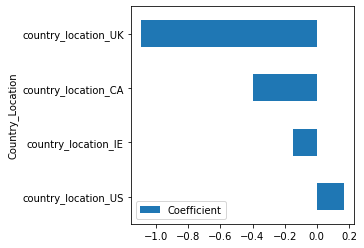

In [267]:
LRmodel_coef.plot(kind='barh', x='Country_Location', y='Coefficient', figsize=(4, 4));

### Analysis of logistic regression coefficients

The first features here is country_location_UK, the binary column for this dummified feature determines whether or not a job is in the US not in the US etc. The positive outcomes class for this classification problem is 'HIGH' salary, which has been given a label of 1.

The negative coefficient of country_location_uk means that all else being equal UK jobs are more likely to have a low Salary. The postitive coefficient of country_location_us means that all else being equal US jobs are more likely to have a high salary. 

We can compare the size of the coefficients by magnitude. For example the rounded coefficient of country_location_CA is -0.4 and for country_location_ie -0.15, this means the effect of the job being in Canada in negatively predicting the positive class is more than twice as big as the effect of the job being in Ireland predicting against a high salary. 

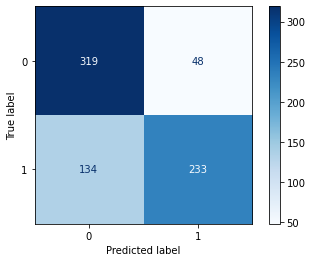

In [268]:
from sklearn.metrics import plot_confusion_matrix, plot_roc_curve
import matplotlib.pyplot as plt

plot_confusion_matrix(LRmodel, x_train_std, y_train, cmap=plt.cm.Blues)
plt.grid(False)
plt.show()

## K Nearest Neighbors Classifier

In [274]:
# Get the best KNN model using a gridsearch

grid_params = {
    'n_neighbors': [x for x in range(1,50)],
    'weights': ['uniform','distance'],
    'metric' : ['manhattan']
}
# Really does not like Euclidian for some reason! 

gs = GridSearchCV(
        KNeighborsClassifier(),
        grid_params,
        verbose=1,
        cv = 5)

gs_results = gs.fit(x_train_std, y_train)

Fitting 5 folds for each of 98 candidates, totalling 490 fits


In [275]:
gs_results.best_params_

{'metric': 'manhattan', 'n_neighbors': 13, 'weights': 'uniform'}

In [276]:
gs.best_score_

0.7519895629484671

In [277]:
best_knn = KNeighborsClassifier(n_neighbors=13, weights ='uniform', metric='manhattan')

In [278]:
# Scores for the best KNN model 

model_fitter(best_knn, x_train_std, y_train, x_test_std, y_test)

[0.79591837 0.70748299 0.81632653 0.72789116 0.71232877]


'Mean cv score = 0.7519895629484671, training score = 0.7520435967302452, test score = 0.6902173913043478.'

## KNN Model evaluation

The KNN model gives as score around 74% which is 24% above the baseline for predicting whether a salary is low or high. The Mean CV score and training Score are very close lending weight to the model, but the test score is slightly lower meaning the model may not generalise well. As KNN is a non-parametric model there are no coefficients to interpret. 

## Adding more features to the model 

In [279]:
# The loop below looks through each entry in the job title column of the dataframe and checks for keywords in order
# to classify the type of job advertised. Some of the jobs had more than one of the keywords (eg Scientist / Engineer)
# hence the loop is written in order of priority. 

job_class = []

for i in jobs.job_title:
        if 'scientist' in i.lower():
            job_class.append('scientist')
        elif 'engineer' in i.lower():
            job_class.append('engineer')
        elif 'analy'in i.lower():
            job_class.append('analyst')
        elif 'lecturer' in i.lower() or 'fellow' in i.lower():
            job_class.append('academic')
        elif 'statistic' in i.lower():
            job_class.append('statistician')
        elif 'developer' in i.lower():
            job_class.append('developer')
        elif 'natural language' in i.lower() or 'nlp' in i.lower():
            job_class.append('NLP')
        else:
            job_class.append('other')
        

jobs['job_class'] = job_class

jobs.job_class.value_counts()

scientist       317
other           205
engineer        176
analyst         140
developer        52
academic         14
statistician     11
NLP               3
Name: job_class, dtype: int64

In [280]:
# The loop below looks through each entry in the job title column of the dataframe and checks for keywords in order
# to classify the level of job advertised. Some of the jobs had more than one of the keywords (eg Junior / Mid)
# hence the loop is written in order of priority. 

job_level = []

for i in jobs.job_title:
    if 'senior' in i.lower() or 'snr' in i.lower() or 'lead' in i.lower() or 'principal' in i.lower():
        job_level.append('Senior')
    elif 'junior' in i.lower() or 'jnr' in i.lower():
        job_level.append('Junior')
    elif 'mid' in i.lower():
        job_level.append('Mid')
    else:
        job_level.append('other')
    
jobs['job_level'] = job_level 

jobs.job_level.value_counts()

other     670
Senior    235
Junior     11
Mid         2
Name: job_level, dtype: int64

In [281]:
jobs.head(5)

,job_title,company_name,company_location,salary,job_snippet,country_location,salary_class,job_class,job_level
0,newEcologist/Data Scientist,Department of Agriculture & Water Resources,Darwin NT,62838.6,Experience developing AI/deep learning workflo...,AU,1,scientist,other
1,newEcologist/Data Scientist,Australian Department of the Environment,Darwin NT,62838.6,Experience developing AI/deep learning workflo...,AU,1,scientist,other
2,newData Scientist,The Staffing Group,Sydney NSW+1 location,63250.0,"A strong background in data science, analytics...",AU,1,scientist,other
3,newData Professional - Data Analyst/Scientist ...,The Staffing Group,Melbourne VIC+1 location,52250.0,We are looking for a data analyst/scientist wh...,AU,0,scientist,other
4,Junior Machine Learning Engineer,XY Sense,Melbourne VIC,44000.0,Reporting directly to the CTO with technical l...,AU,0,engineer,Junior


In [282]:
x2 = jobs[['country_location','job_class','job_level']]
x2_dum = pd.get_dummies(x2, drop_first=True)
y = jobs['salary_class']

In [283]:
x2_train, x2_test, y_train, y_test = train_test_split(x2_dum, y,
                        stratify=y, test_size=0.2, random_state=102)

In [284]:
scaler = StandardScaler()

x2_train_std = pd.DataFrame(scaler.fit_transform(x2_train), 
                       columns=x2_train.columns)

x2_test_std = pd.DataFrame(scaler.transform(x2_test), 
                      columns=x2_train.columns)

In [286]:
models = [KNeighborsClassifier(),
          LogisticRegression(solver='lbfgs', max_iter=1000),
          DecisionTreeClassifier(),
          RandomForestClassifier(n_estimators=100),
          ExtraTreesClassifier(n_estimators=100)]

for model in models:
    print(model)
    print(model_fitter(model, x2_train_std, y_train, x2_test_std, y_test))

KNeighborsClassifier()
[0.76190476 0.73469388 0.74829932 0.70748299 0.68493151]
Mean cv score = 0.7274624918460535, training score = 0.7425068119891008, test score = 0.7065217391304348.
LogisticRegression(max_iter=1000)
[0.78911565 0.74829932 0.80272109 0.75510204 0.71917808]
Mean cv score = 0.7628832354859751, training score = 0.7724795640326976, test score = 0.7717391304347826.
DecisionTreeClassifier()
[0.78231293 0.73469388 0.80952381 0.74829932 0.74657534]
Mean cv score = 0.7656415991053955, training score = 0.779291553133515, test score = 0.7391304347826086.
RandomForestClassifier()
[0.78911565 0.73469388 0.79591837 0.71428571 0.71917808]
Mean cv score = 0.7547292889758642, training score = 0.779291553133515, test score = 0.75.
ExtraTreesClassifier()
[0.78911565 0.73469388 0.78911565 0.75510204 0.73972603]
Mean cv score = 0.7615506476563227, training score = 0.779291553133515, test score = 0.7391304347826086.


## Choosing a model
The output above shows the scores for different models. Again logistic regression comes out with the best mean CV score, the next highest being the Decision Tree Classifier. These models are investigated further below. 

### Logistic Regression model 

In [288]:
# Look for the best logistic regression model 

gs_params = {'penalty': ['l1','l2'],
              'solver': ['liblinear'],
              'C': np.logspace(-3, 0, 100)}

In [289]:
# create a gridsearch object using LogisticRegression() and the dictionary you created above
lr2 = LogisticRegression()

lr2_gridsearch = GridSearchCV(lr2,
                             gs_params,
                             n_jobs=2, 
                             cv=5)

lr2_gridsearch.fit(x2_train_std, y_train)


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=2,
             param_grid={'C': array([0.001     , 0.00107227, 0.00114976, 0.00123285, 0.00132194,
       0.00141747, 0.00151991, 0.00162975, 0.00174753, 0.00187382,
       0.00200923, 0.00215443, 0.00231013, 0.00247708, 0.00265609,
       0.00284804, 0.00305386, 0.00327455, 0.00351119, 0.00376494,
       0.00403702, 0.00432876, 0.00464159, 0.00497702, 0.0053367 ,...
       0.13219411, 0.14174742, 0.15199111, 0.16297508, 0.17475284,
       0.18738174, 0.2009233 , 0.21544347, 0.23101297, 0.24770764,
       0.26560878, 0.28480359, 0.30538555, 0.32745492, 0.35111917,
       0.37649358, 0.40370173, 0.43287613, 0.46415888, 0.49770236,
       0.53366992, 0.57223677, 0.61359073, 0.65793322, 0.70548023,
       0.75646333, 0.81113083, 0.869749  , 0.93260335, 1.        ]),
                         'penalty': ['l1', 'l2'], 'solver': ['liblinear']})

In [290]:
lr2_gridsearch.best_score_

0.7656229615133726

In [291]:
lr2_gridsearch.best_params_

{'C': 0.23101297000831605, 'penalty': 'l1', 'solver': 'liblinear'}

In [292]:
best_lr = LogisticRegression(penalty='l1', solver='liblinear', C=0.23101297000831605)
model_fitter(best_lr, x2_train_std, y_train, x2_test_std, y_test )

[0.78911565 0.7414966  0.79591837 0.76870748 0.73287671]


'Mean cv score = 0.7656229615133726, training score = 0.7697547683923706, test score = 0.7717391304347826.'

In [297]:
best_lr_coef = pd.DataFrame(list(zip(x2_train_std.columns, best_lr.coef_[0])), 
                           columns=['Feature','Coefficient']).sort_values(by='Coefficient', ascending=False )
coef = best_lr_coef[best_lr_coef['Coefficient'] != 0]

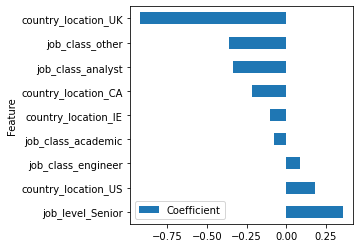

In [298]:
coef.plot(kind='barh', x='Feature', y='Coefficient', figsize=(4, 4));

# Coefficients of 0 have been removed 

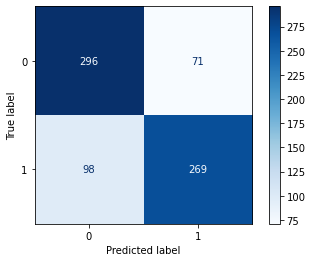

In [355]:
from sklearn.metrics import plot_confusion_matrix, plot_roc_curve
import matplotlib.pyplot as plt

plot_confusion_matrix(best_lr, x2_train_std, y_train, cmap=plt.cm.Blues)
plt.grid(False)
plt.show()

### Model Analysis

The logistic regression with the new features now gives a 77% accuracy, 27% above the baseline and several percent above the score for the single feature linear regression model. The mean CV score and training score are close, supporting the model, and the test score is now slightly higher than the other scores possibly suggesting an under-fit, however the scores are close enough for this not to be concerning. 

### Decision Tree Classifier 

In [342]:
gs2_params = {'criterion':['gini','entropy'],
              'splitter':["best", "random"], 
        'max_features': [6,7,8,9,10,11,12,13,14],
        'min_samples_leaf': [2,3,4,5,6,7],
        'min_samples_split': [2,3,4,5,6,7,8,9,10]}


DTC = DecisionTreeClassifier()

DTC_gridsearch = GridSearchCV(DTC,
                             gs2_params,
                             n_jobs=2, 
                             cv=5,
                             verbose=1)

DTC_gridsearch.fit(x2_train_std, y_train)

Fitting 5 folds for each of 1944 candidates, totalling 9720 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=2,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': [6, 7, 8, 9, 10, 11, 12, 13, 14],
                         'min_samples_leaf': [2, 3, 4, 5, 6, 7],
                         'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'splitter': ['best', 'random']},
             verbose=1)

In [343]:
DTC_gridsearch.best_score_

0.7751654086292051

In [344]:
DTC_gridsearch.best_params_

{'criterion': 'gini',
 'max_features': 9,
 'min_samples_leaf': 4,
 'min_samples_split': 10,
 'splitter': 'random'}

In [346]:
best_DTC = DecisionTreeClassifier(criterion='gini',max_features=9,
                                  min_samples_leaf=4, min_samples_split=10,splitter = 'random')

In [347]:
model_fitter(best_DTC, x2_train_std, y_train, x2_test_std, y_test)

[0.76870748 0.72789116 0.81632653 0.74829932 0.7260274 ]


'Mean cv score = 0.7656415991053955, training score = 0.771117166212534, test score = 0.7663043478260869.'

## Decision Tree Classifier analysis

This model has a mean CV score of 77% the model appears to be the most appropriate for the data given that the mean CV and training scores are very close and the test scores is also very close. This is reliable model. 

### Overall

Both the classification models which included the extra features had higher CV, training and test scores than the models based on a single feature, hence these are preferable. 

Looking at the second set of models which included extra features the linear regression model is preferable. Although the mean CV scores for this model and the decision tree classifier model are significantly similar, the test score for the linear regerssion model is higher meaning this model generalises better. 

### Model evaluation:

Your boss would rather tell a client incorrectly that they would get a lower salary job than tell a client incorrectly that they would get a high salary job. Adjust one of your models to ease his mind, and explain what it is doing and any tradeoffs.


- Use cross-validation to evaluate your models.
- Evaluate the accuracy, AUC, precision and recall of the models.
- Plot the ROC and precision-recall curves for at least one of your models.

### Notes

As high salary is the positive outcomes for this model and the boss would rather incorrectly tell a client they would get a lower salary job he wants to decrease the false positives. In order to do this we will increase the threshold for the positive classification of high salary. This means that we want a high precision score for the models, which means we will be getting a trade-off with a lower accuracy score. 

We will look at this situation in the two best models above, that is the linear regression with many features and the decision trees classifier with many features. 

## Linear Regression many features model 

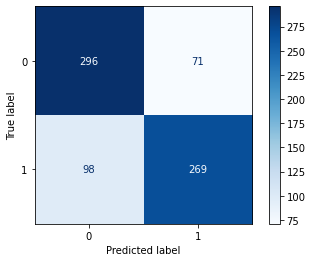

In [364]:
plot_confusion_matrix(best_lr, x2_train_std, y_train, cmap=plt.cm.Blues)
plt.grid(False)
plt.show()

In [400]:
y_pp = pd.DataFrame(best_lr.predict_proba(x2_train_std), 
             columns=['class_0_pp', 'class_1_pp'])
y_pp

,class_0_pp,class_1_pp
0,0.171654,0.828346
1,0.681299,0.318701
2,0.179693,0.820307
3,0.669125,0.330875
4,0.669125,0.330875
...,...,...
729,0.141691,0.858309
730,0.068389,0.931611
731,0.669125,0.330875
732,0.191217,0.808783


In [401]:
def predict_at_threshold(x, threshold=0.7):
    if x >= threshold:
        return 1
    else:
        return 0

In [402]:
y_pp['Predicted labels'] = y_pp.class_1_pp.map(predict_at_threshold)
predictions = y_pp['Predicted labels']
predictions.value_counts()

0    516
1    218
Name: Predicted labels, dtype: int64

In [403]:
from sklearn.metrics import plot_confusion_matrix, plot_roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score, average_precision_score, plot_roc_curve, plot_precision_recall_curve

In [404]:
print(confusion_matrix(y_train, predictions))

[[334  33]
 [182 185]]


## Analysis 

We can see from the confusion matrix that this has decreased the number of false positives from 71 to 33, which is what the boss was hoping for. However the trade off for this is the following:

1. The overall number of correctly classified points has decreased from 565 to 519. The number of true positives has decreased from 269 to 185 but the number of true negatives has increased from 296 to 334. This means the overall accuracy of our model has decrased as in total we have correctly classified less data points. 


2. In order to decrease the false positives from 71 to 33 we have have also inadvertantly inceased the number of false negatives from 98 to 182, meaning we are telling people they will recieve a low salary when it is actually high. It does not seem the boss is concerned with this however. 


In [405]:
print(classification_report(y_train, predictions, digits=4))

              precision    recall  f1-score   support

           0     0.6473    0.9101    0.7565       367
           1     0.8486    0.5041    0.6325       367

    accuracy                         0.7071       734
   macro avg     0.7480    0.7071    0.6945       734
weighted avg     0.7480    0.7071    0.6945       734



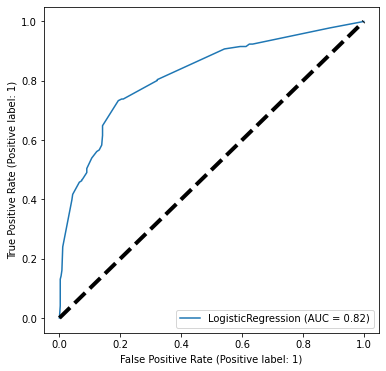

In [406]:
fig, ax = plt.subplots(figsize=(6, 6))
plot_roc_curve(best_lr, x2_train_std, y_train, ax=ax)
ax.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.show()

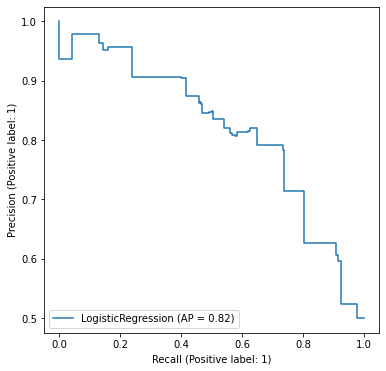

In [407]:
fig, ax = plt.subplots(figsize=(6, 6))
plot_precision_recall_curve(best_lr, x2_train_std, y_train, ax=ax)
plt.show()

## Decision Trees Classifier many features model 

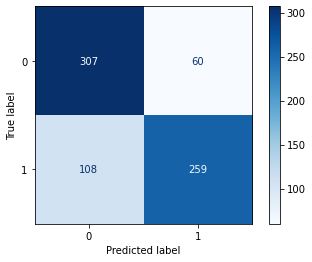

In [408]:
plot_confusion_matrix(best_DTC, x2_train_std, y_train, cmap=plt.cm.Blues)
plt.grid(False)
plt.show()

In [409]:
y_pp = pd.DataFrame(best_DTC.predict_proba(x2_train_std), 
             columns=['class_0_pp', 'class_1_pp'])
y_pp

,class_0_pp,class_1_pp
0,0.151515,0.848485
1,0.863636,0.136364
2,0.125000,0.875000
3,0.693182,0.306818
4,0.693182,0.306818
...,...,...
729,0.033333,0.966667
730,0.062500,0.937500
731,0.693182,0.306818
732,0.347826,0.652174


In [410]:
y_pp['Predicted labels'] = y_pp.class_1_pp.map(predict_at_threshold)
predictions = y_pp['Predicted labels']
predictions.value_counts()

0    534
1    200
Name: Predicted labels, dtype: int64

In [411]:
print(confusion_matrix(y_train, predictions))

[[348  19]
 [186 181]]


In [412]:
print(classification_report(y_train, predictions, digits=4))

              precision    recall  f1-score   support

           0     0.6517    0.9482    0.7725       367
           1     0.9050    0.4932    0.6384       367

    accuracy                         0.7207       734
   macro avg     0.7783    0.7207    0.7055       734
weighted avg     0.7783    0.7207    0.7055       734



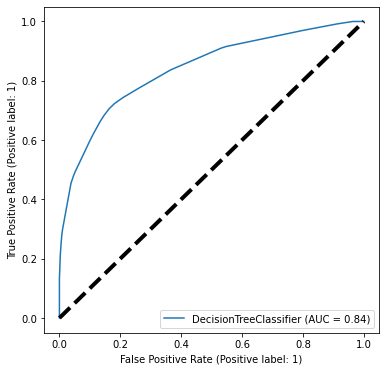

In [413]:
fig, ax = plt.subplots(figsize=(6, 6))
plot_roc_curve(best_DTC, x2_train_std, y_train, ax=ax)
ax.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.show()

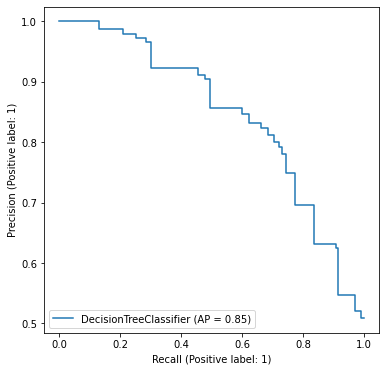

In [414]:
fig, ax = plt.subplots(figsize=(6, 6))
plot_precision_recall_curve(best_DTC, x2_train_std, y_train, ax=ax)
plt.show()

## Final Analysis

Overall the final model I would show to the boss would be the many features decision tree classifier with the threshold ammended to 0.7. This model had good mean CV, training and test scores. When the threshold was ammended for both the many features models the decision trees model had a larger precision score, as well as a larger AUC score and AP score on the ROC curve, making it the most desirable model in this particular scenario. 

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### Bonus:

- Answer the salary discussion by using your model to explain the tradeoffs between detecting high vs low salary positions. 
- Discuss the differences and explain when you want a high-recall or a high-precision model in this scenario.
- Obtain the ROC/precision-recall curves for the different models you studied (at least the tuned model of each category) and compare.

In [232]:
## I think I've done some of this above?

### Summarize your results in an executive summary written for a non-technical audience.
   
- Writeups should be at least 500-1000 words, defining any technical terms, explaining your approach, as well as any risks and limitations.

In [233]:
## YOUR TEXT HERE IN MARKDOWN FORMAT 

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### BONUS

Convert your executive summary into a public blog post of at least 500 words, in which you document your approach in a tutorial for other aspiring data scientists. Link to this in your notebook.

In [234]:
## YOUR LINK HERE IN MARKDOWN FORMAT 